# Анализ структуры и основных характеристик датасета пассажиров Титаника

### Опять эта парочка не настрадалась короче))

![Опять эта парочка](Titanic.jpeg)

_**Цель работы**: Изучить структуру и основные статистические показатели датасета пассажиров Титаника с использованием библиотеки **matplotlib**._

In [55]:
# Импортируем библиотеки
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
# Считываем таблицу
table = pd.read_csv('./data/train.csv')

table

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Задание 1:

Определите количество признаков и их типы, проверьте наличие пропущенных данных, выведите основные статистические характеристики (среднее значение, стандартное отклонение, минимальное и максимальное значения) для числовых признаков и уникальные значения для категориальных признаков в датасете.


In [57]:
# Определите количество признаков и их типы
print('Количество признаков и их типы:')
print(table.dtypes)

Количество признаков и их типы:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [58]:
# Проверьте наличие пропущенных данных
print('Проверьте наличие пропущенных данных:')
print(table.isnull().sum())

Проверьте наличие пропущенных данных:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [59]:
# Выведите основные статистические характеристики (среднее значение, стандартное отклонение, минимальное и максимальное значения) для числовых признаков
print('Основные статистические характеристики для числовых признаков:')
print(table.describe())

Основные статистические характеристики для числовых признаков:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [60]:
# Выведите уникальные значения для столбцов Survived, Pclass, Sex, Embarked
print('Уникальные значения для столбцов Survived, Pclass')
print('Survived: ', table['Survived'].unique())
print('Pclass: ',table['Pclass'].unique())
print('Sex: ', table['Sex'].unique())
print('Embarked: ', table['Embarked'].unique())

Уникальные значения для столбцов Survived, Pclass
Survived:  [0 1]
Pclass:  [3 1 2]
Sex:  ['male' 'female']
Embarked:  ['S' 'C' 'Q' nan]


## Задание 2:

Построение графика "распределения выживших по полу" с использованием библиотеки **matplotlib**. Создайте столбчатую или круговую диаграмму, которая покажет, сколько мужчин и женщин выжило и погибло.

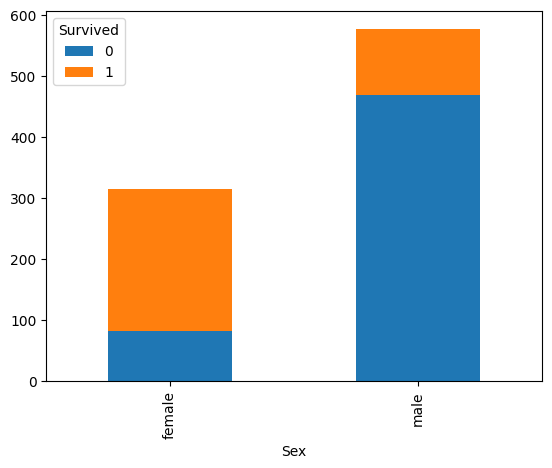

In [61]:
table.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

## Задание 3:

Создание **scatter plot** для анализа взаимосвязи между возрастом и ценой билета. Используя библиотеку **matplotlib**, постройте точечную диаграмму, где по оси **X** будет возраст пассажира, а по оси **Y** - цена билета. Отобразите выживших и погибших пассажиров разными цветами или маркерами.

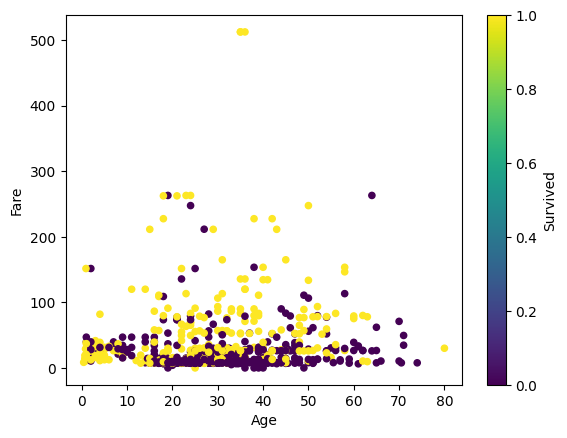

In [62]:
table.plot.scatter(x='Age', y='Fare', c='Survived', cmap='viridis')
plt.show()